In [1]:
import os
import subprocess
import sys  # Adicionado o import do sys

def setup_environment():
    # Baixar o arquivo ZIP do Dropbox
    download_url = "https://www.dropbox.com/scl/fo/5mbf2xq1tkbv3uqaahypf/AJg0sUw1ufTBQFSx-OuQTxw?rlkey=6c9py2vogdcha59r7dc8r2hes&st=wu8ihemy&dl=1"
    zip_filename = "dropbox_folder.zip"

    # Usar wget para baixar o arquivo
    os.system(f"wget -O {zip_filename} \"{download_url}\"")

    # Descompactar o arquivo ZIP
    os.system(f"unzip {zip_filename}")

    # Instalar as dependências necessárias
    dependencies = ["xarray", "cfgrib", "matplotlib", "cartopy", "scipy", "numpy"]

    for dep in dependencies:
        subprocess.check_call([sys.executable, "-m", "pip", "install", dep])

# Chamar a função para configurar o ambiente
setup_environment()

In [2]:
import requests

# URL do arquivo
url = "https://access-s.clide.cloud/files/global/monthly/data/rain.forecast.anom.monthly.nc"

# Nome do arquivo para salvar
filename = url.split("/")[-1]

# Faz o download do arquivo
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(filename, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print(f"Download concluído: {filename}")
else:
    print("Erro ao baixar o arquivo.")

Download concluído: rain.forecast.anom.monthly.nc


In [3]:
import xarray as xr
from datetime import datetime
import pandas as pd

# Abrir o dataset
ds = xr.open_dataset("rain.forecast.anom.monthly.nc")

# Verificar se existe coordenada de tempo
if "time" in ds.coords:
    # Converter vetor de tempo para pandas.DatetimeIndex
    time_index = pd.to_datetime(ds["time"].values)

    # Data de hoje
    hoje = pd.to_datetime(datetime.today())

    # Encontrar índice da data mais próxima
    closest_time_idx = abs(time_index - hoje).argmin()

    # Selecionar o dado de anomalia para a data mais próxima
    anom = ds["rain"].isel(time=closest_time_idx)

    # Obter nome do período para título
    forecast_period = time_index[closest_time_idx].strftime("%b %Y")

    # Forecast date (run date) dos atributos globais
    forecast_date = ds.attrs.get("forecast_date", "N/A")
    forecast_datetime = datetime.strptime(forecast_date, "%Y%m%d")
    formatted_forecast_date = forecast_datetime.strftime("%d %b %Y")

    # Criar título
    titulo = f"Model Run: {formatted_forecast_date}  Valid: {forecast_period}"
    print(titulo)
else:
    print("O arquivo não possui coordenada temporal 'time'.")


Model Run: 12 May 2025  Valid: Jun 2025


In [18]:
from google.colab import files
import zipfile
import os

# Função para fazer upload do arquivo zip
uploaded = files.upload()

# Descompacta o arquivo zip
for arquivo in uploaded.keys():
    if arquivo.endswith(".zip"):
        # Cria uma pasta para armazenar os arquivos descompactados
        pasta_destino = arquivo.replace('.zip', '')
        os.makedirs(pasta_destino, exist_ok=True)

        # Extrai o conteúdo do arquivo zip para a pasta
        with zipfile.ZipFile(arquivo, 'r') as zip_ref:
            zip_ref.extractall(pasta_destino)

        print(f"Arquivos descompactados para a pasta: {pasta_destino}")
    else:
        print("Por favor, envie um arquivo zip")

Saving area_estudo_proj.zip to area_estudo_proj.zip
Arquivos descompactados para a pasta: area_estudo_proj


In [5]:
from google.colab import files

# Isso abrirá um seletor de arquivos para você enviar a imagem do seu computador
uploaded = files.upload()



Saving Logo transparente.png to Logo transparente.png


Máxima anomalia na área especificada: 197.90823
Mínima anomalia na área especificada: -141.4968


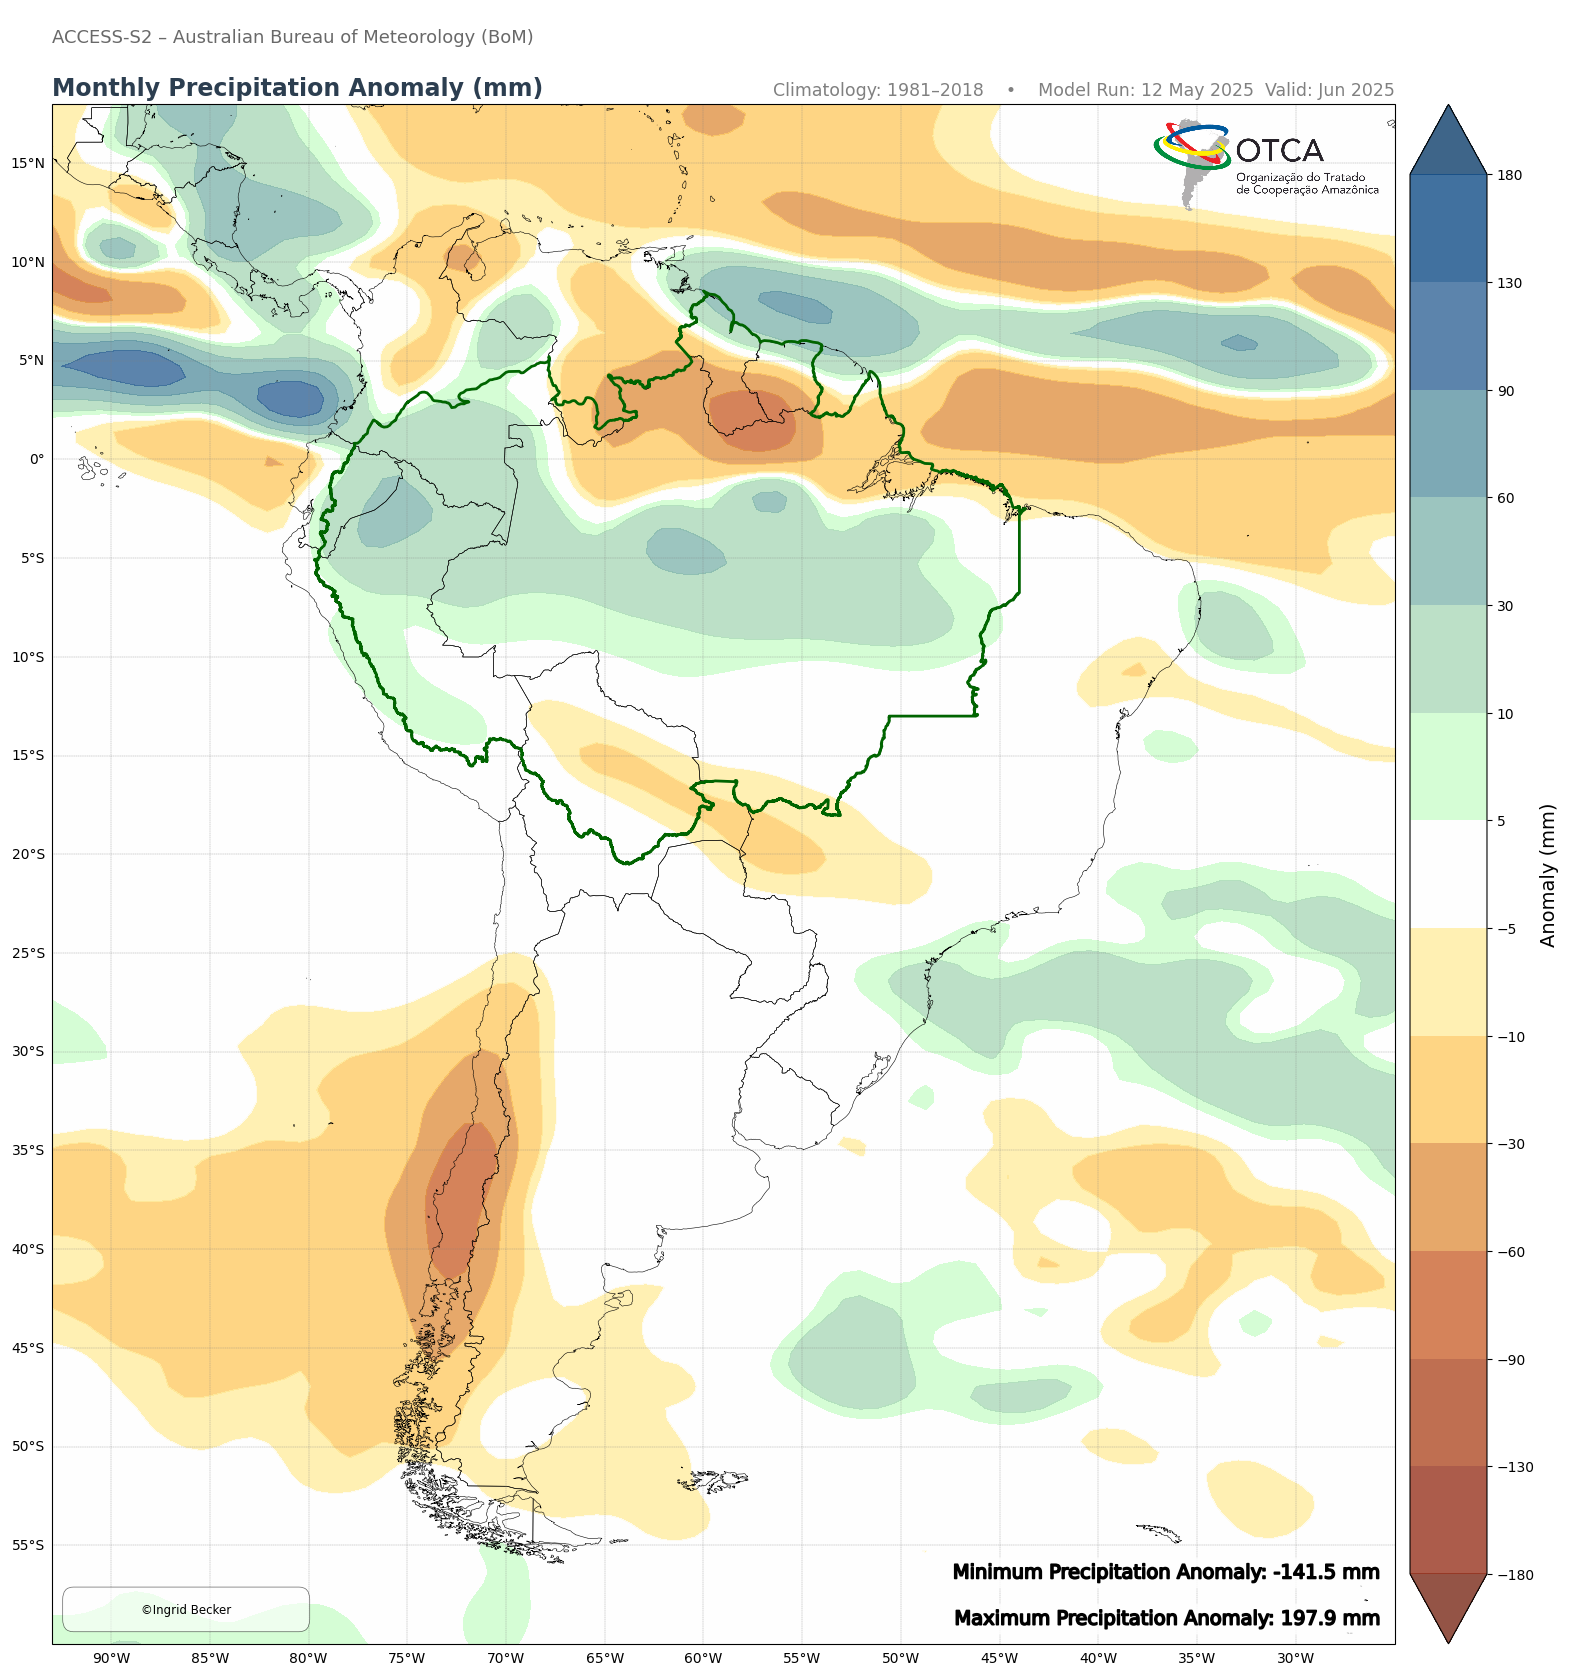

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.ndimage import maximum_filter, minimum_filter



def plot_maxmin_points(lon, lat, data, extrema, nsize, color='k', transform=None, ax=None):
    if extrema == 'max':
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif extrema == 'min':
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError("O parâmetro 'extrema' deve ser 'max' ou 'min'")

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        ax.annotate(
            f'{int(data[mxy[i], mxx[i]])}',  # Apenas o valor
            xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]),
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
            color=color, size=12, weight='normal', fontfamily='sans-serif',
            horizontalalignment='center', verticalalignment='center',
            bbox=dict(boxstyle="round,pad=0.4", edgecolor="none", facecolor="white", alpha=0.6),
            path_effects=[path_effects.withStroke(linewidth=1.5, foreground="black")],
            clip_on=True, annotation_clip=True,
            transform=ccrs.PlateCarree()
        )

import scipy.ndimage as ndimage
anomP=ndimage.gaussian_filter(anom,sigma=1.5,order=0)

cores_=['#d13367','#c60041','#b7002c','#a70016','#8a0003','#901509','#952c14','#9c431f','#a1592a','#a86e34','#c88527','#db9c1a',
       '#ecb20d','#ffde00','#ffeb40','#fff980','#ffffbf','#ffffff','#ffffff','#bff8bf','#80f180','#40ea40','#00dc00','#00c826',
       '#00b64b','#00a16f','#009596','#00a0ac','#00acc0','#00b7d4','#00c2ea','#00d8ff','#49a9e0','#6e92d2','#9379c3','#76619c']
levels_=[-600,-500,-450,-400,-350,-300,-250,-200,-150,-125,-100,-75,-50,-40,-30,-20,-10,-5,0,5,10,20,30,40,50,75,100,125,150,
        200,250,300,350,400,450,500,600]

cores = ['#792918', '#97331e', '#b04b26', '#cb6431', '#e09345', '#fecb65', '#ffeda0', '#fefefe',
         '#cbfdcb', '#abd9b9', '#84b7af', '#5d94a3', '#336598', '#124d87', '#0e3e6c']
levels = [-180, -130, -90, -60, -30, -10, -5, 5, 10, 30, 60, 90, 130, 180]

cores_ = ['#935c25', '#ad763e', '#c09569', '#d1b293','#e3d0be', '#f2ece8', '#fefefe', '#d5e9e9', '#acd5d5', '#84c0c0', '#5bacac','#339898','#297979']
levels_= [-200, -100, -50, -25, -10, -5, 5, 10, 25, 50, 100, 200]


# === Título principal (científico, conciso e elegante) ===

# Criar a figura e um único eixo
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

# Definir o título ou informações no gráfico
ax.text(0.0, 1.04, 'ACCESS-S2 – Australian Bureau of Meteorology (BoM)',
        fontsize=13, fontweight='normal', color='dimgray', transform=ax.transAxes)

# Título principal do mapa (mais visível)
ax.set_title('Monthly Precipitation Anomaly (mm)',
             fontweight='bold', fontsize=17, loc='left', color='#2c3e50')

# Subtítulo com período de base e data de previsão
ax.set_title(f'Climatology: 1981–2018    •    {titulo}',
             fontsize=12.5, loc='right', color='gray')


# Definir os limites do mapa (extent)
extent = [-25, -93, -60, 18] # América do Sul
ax.set_extent(extent, crs=ccrs.PlateCarree())


# --- Adicionar a logomarca ---
# Substitua pelo caminho correto da sua imagem PNG (com fundo transparente, de preferência)
logo_path = '/content/Logo transparente.png'
logo = mpimg.imread(logo_path)
imagebox = OffsetImage(logo, zoom=0.20)

# Posição no canto superior direito do eixo (valores entre 0 e 1, em fração do eixo)
xy_logo = (0.98,0.98)  # canto superior direito

ab = AnnotationBbox(
    imagebox, xy_logo,
    xycoords='axes fraction',
    frameon=False,
    box_alignment=(0.84, 0.6)  # alinha a imagem pelo topo e direita
)

ax.add_artist(ab)


# Definir os limites do mapa (extent)
extent = [-25, -93, -60, 18] # América do Sul
ax.set_extent(extent, crs=ccrs.PlateCarree())


# Adicionar shapefile de países
st0 = list(shpreader.Reader('ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(st0, ccrs.PlateCarree(), edgecolor='k', facecolor='none',
                  linestyle='-', linewidths=.4, zorder=2)

# Adicionar shapefile de estados/províncias
#st1 = list(shpreader.Reader('ne_10m_admin_1_states_provinces.shp').geometries())
#ax.add_geometries(st1, ccrs.PlateCarree(), edgecolor='k', facecolor='none',
                  #linestyle='-', linewidths=.4, zorder=2)

# Adicionar e destacar área de estudo (Amazônia) com borda verde claro
area_estudo = list(shpreader.Reader('/content/area_estudo_proj.zip').geometries())
ax.add_geometries(area_estudo, ccrs.PlateCarree(),
                  edgecolor='darkgreen', facecolor='none',
                  linewidth=2.0, linestyle='-', zorder=5)




# Adicionar rótulos de coordenadas
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Criar grade de coordenadas
lon, lat = np.meshgrid(anom.lon, anom.lat)

lon = (lon - 360) if lon.max() > 180 else lon

# Calcular máscara para o extent
mask_lon = (lon >= extent[1]) & (lon <= extent[0])
mask_lat = (lat >= extent[2]) & (lat <= extent[3])
mask = mask_lon & mask_lat

# Calcular máxima precipitação
max_anom = np.nan
if np.any(mask):
    max_anom = np.nanmax(np.where(mask, anom, np.nan))
    print("Máxima anomalia na área especificada:", max_anom)
else:
    print("Não há dados na área especificada.")

min_anom = np.nan
if np.any(mask):
    min_anom = np.nanmin(np.where(mask, anom, np.nan))
    print("Mínima anomalia na área especificada:", min_anom)
else:
    print("Não há dados na área especificada.")

# Adicionar texto no gráfico para o valor máximo de precipitação
ax.text(0.99, 0.01, f'Maximum Precipitation Anomaly: {max_anom:.1f} mm',
        transform=ax.transAxes, ha='right', va='bottom', fontsize=14,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='none'),
        path_effects=[path_effects.withStroke(linewidth=1.2, foreground="black")])

ax.text(0.99, 0.04, f'Minimum Precipitation Anomaly: {min_anom:.1f} mm',
        transform=ax.transAxes, ha='right', va='bottom', fontsize=14,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='none'),
        path_effects=[path_effects.withStroke(linewidth=1.2, foreground="black")])


# Calcular fraction automaticamente
fig_height = fig.get_size_inches()[1]
ax_height = (ax.get_position().y1 - ax.get_position().y0) * fig_height
fraction = ax_height / fig_height * 0.0645  # Ajuste 0.1 conforme necessário para espaçamento

# Adicionar colorbar com ajuste automático
cont = ax.contourf(lon, lat, anomP, levels=levels, colors=cores, alpha=0.8, extend='both', transform=ccrs.PlateCarree())
cbar = plt.colorbar(cont, ax=ax, orientation='vertical', fraction=fraction, pad=0.01)
cbar.set_label('Anomaly (mm)', fontsize=14)
cbar.set_ticks(levels)


# === Parâmetros refinados da assinatura ===
rect_x = 0.01
rect_y = 0.01
rect_width = 0.18
rect_height = 0.025

# === Retângulo branco semi-transparente com borda sutil e cantos suavemente arredondados ===
rectangle = patches.FancyBboxPatch(
    (rect_x, rect_y), rect_width, rect_height,
    boxstyle="round,pad=0.002,rounding_size=0.008",
    transform=ax.transAxes,
    linewidth=0.5,
    edgecolor='black',
    facecolor='white',
    alpha=0.6,
    zorder=10
)
ax.add_patch(rectangle)

# === Texto centralizado com estilo clean e elegante ===
ax.text(
    rect_x + rect_width / 2,
    rect_y + rect_height / 2,
    '©Ingrid Becker',
    transform=ax.transAxes,
    fontsize=8.5,
    color='black',
    ha='center', va='center',
    zorder=11,
    fontname='DejaVu Sans'  # Ou outra fonte moderna que tenha suporte
)

# Salvar a imagem
plt.savefig('ACCESS_S2_anom_prec_'+'.jpeg', dpi=300, bbox_inches='tight')

plt.show()

Máxima anomalia na área especificada: 197.90823
Mínima anomalia na área especificada: -141.4968


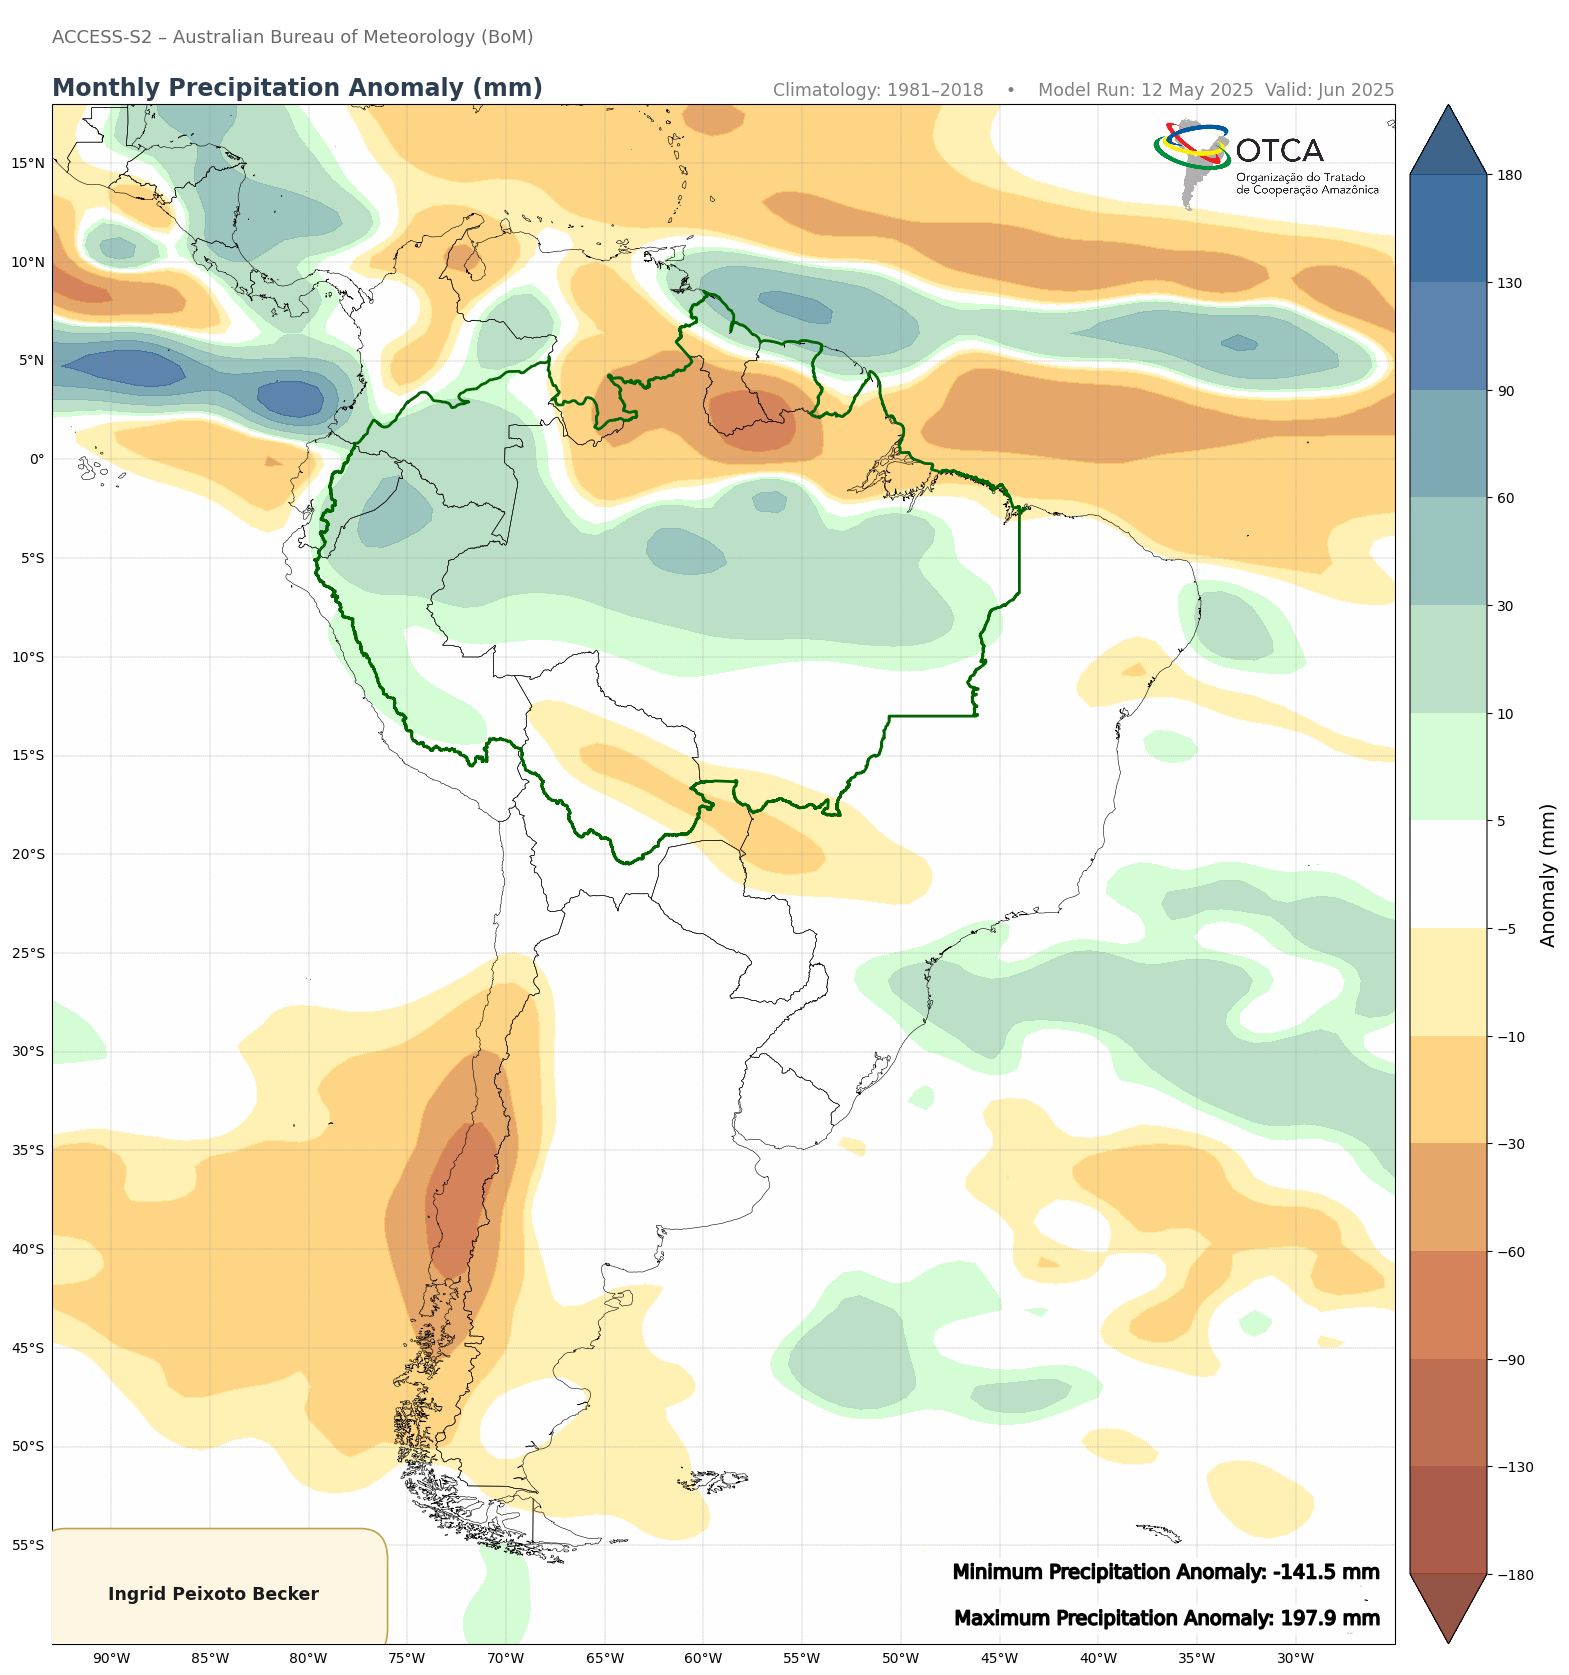

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.ndimage import maximum_filter, minimum_filter

def plot_maxmin_points(lon, lat, data, extrema, nsize, color='k', transform=None, ax=None):
    if extrema == 'max':
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif extrema == 'min':
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError("O parâmetro 'extrema' deve ser 'max' ou 'min'")

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        ax.annotate(
            f'{int(data[mxy[i], mxx[i]])}',  # Apenas o valor
            xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]),
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
            color=color, size=12, weight='normal', fontfamily='sans-serif',
            horizontalalignment='center', verticalalignment='center',
            bbox=dict(boxstyle="round,pad=0.4", edgecolor="none", facecolor="white", alpha=0.6),
            path_effects=[path_effects.withStroke(linewidth=1.5, foreground="black")],
            clip_on=True, annotation_clip=True,
            transform=ccrs.PlateCarree()
        )

import scipy.ndimage as ndimage
anomP=ndimage.gaussian_filter(anom,sigma=1.5,order=0)

cores_=['#d13367','#c60041','#b7002c','#a70016','#8a0003','#901509','#952c14','#9c431f','#a1592a','#a86e34','#c88527','#db9c1a',
       '#ecb20d','#ffde00','#ffeb40','#fff980','#ffffbf','#ffffff','#ffffff','#bff8bf','#80f180','#40ea40','#00dc00','#00c826',
       '#00b64b','#00a16f','#009596','#00a0ac','#00acc0','#00b7d4','#00c2ea','#00d8ff','#49a9e0','#6e92d2','#9379c3','#76619c']
levels_=[-600,-500,-450,-400,-350,-300,-250,-200,-150,-125,-100,-75,-50,-40,-30,-20,-10,-5,0,5,10,20,30,40,50,75,100,125,150,
        200,250,300,350,400,450,500,600]

cores = ['#792918', '#97331e', '#b04b26', '#cb6431', '#e09345', '#fecb65', '#ffeda0', '#fefefe',
         '#cbfdcb', '#abd9b9', '#84b7af', '#5d94a3', '#336598', '#124d87', '#0e3e6c']
levels = [-180, -130, -90, -60, -30, -10, -5, 5, 10, 30, 60, 90, 130, 180]

cores_ = ['#935c25', '#ad763e', '#c09569', '#d1b293','#e3d0be', '#f2ece8', '#fefefe', '#d5e9e9', '#acd5d5', '#84c0c0', '#5bacac','#339898','#297979']
levels_= [-200, -100, -50, -25, -10, -5, 5, 10, 25, 50, 100, 200]


# Criar a figura e um único eixo
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

# Definir o título ou informações no gráfico
ax.text(0.0, 1.04, 'ACCESS-S2 – Australian Bureau of Meteorology (BoM)',
        fontsize=13, fontweight='normal', color='dimgray', transform=ax.transAxes)

# Título principal do mapa (mais visível)
ax.set_title('Monthly Precipitation Anomaly (mm)',
             fontweight='bold', fontsize=17, loc='left', color='#2c3e50')

# Subtítulo com período de base e data de previsão
ax.set_title(f'Climatology: 1981–2018    •    {titulo}',
             fontsize=12.5, loc='right', color='gray')



# --- Adicionar a logomarca ---
# Substitua pelo caminho correto da sua imagem PNG (com fundo transparente, de preferência)
logo_path = '/content/Logo transparente.png'
logo = mpimg.imread(logo_path)
imagebox = OffsetImage(logo, zoom=0.20)

# Posição no canto superior direito do eixo (valores entre 0 e 1, em fração do eixo)
xy_logo = (0.98,0.98)  # canto superior direito

ab = AnnotationBbox(
    imagebox, xy_logo,
    xycoords='axes fraction',
    frameon=False,
    box_alignment=(0.84, 0.6)  # alinha a imagem pelo topo e direita
)

ax.add_artist(ab)


# Definir os limites do mapa (extent)
extent = [-25, -93, -60, 18] # América do Sul
ax.set_extent(extent, crs=ccrs.PlateCarree())


# Adicionar shapefile de países
st0 = list(shpreader.Reader('ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(st0, ccrs.PlateCarree(), edgecolor='k', facecolor='none',
                  linestyle='-', linewidths=.4, zorder=2)

# Adicionar shapefile de estados/províncias
#st1 = list(shpreader.Reader('ne_10m_admin_1_states_provinces.shp').geometries())
#ax.add_geometries(st1, ccrs.PlateCarree(), edgecolor='k', facecolor='none',
                  #linestyle='-', linewidths=.4, zorder=2)

# Adicionar e destacar área de estudo (Amazônia) com borda verde claro
area_estudo = list(shpreader.Reader('/content/area_estudo_proj.zip').geometries())
ax.add_geometries(area_estudo, ccrs.PlateCarree(),
                  edgecolor='darkgreen', facecolor='none',
                  linewidth=2.0, linestyle='-', zorder=5)

# Adicionar rótulos de coordenadas
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25,
                      xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Criar grade de coordenadas
lon, lat = np.meshgrid(anom.lon, anom.lat)

lon = (lon - 360) if lon.max() > 180 else lon

# Calcular máscara para o extent
mask_lon = (lon >= extent[1]) & (lon <= extent[0])
mask_lat = (lat >= extent[2]) & (lat <= extent[3])
mask = mask_lon & mask_lat

# Calcular máxima precipitação
max_anom = np.nan
if np.any(mask):
    max_anom = np.nanmax(np.where(mask, anom, np.nan))
    print("Máxima anomalia na área especificada:", max_anom)
else:
    print("Não há dados na área especificada.")

min_anom = np.nan
if np.any(mask):
    min_anom = np.nanmin(np.where(mask, anom, np.nan))
    print("Mínima anomalia na área especificada:", min_anom)
else:
    print("Não há dados na área especificada.")

# Adicionar texto no gráfico para o valor máximo de precipitação
ax.text(0.99, 0.01, f'Maximum Precipitation Anomaly: {max_anom:.1f} mm',
        transform=ax.transAxes, ha='right', va='bottom', fontsize=14,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='none'),
        path_effects=[path_effects.withStroke(linewidth=1.2, foreground="black")])

ax.text(0.99, 0.04, f'Minimum Precipitation Anomaly: {min_anom:.1f} mm',
        transform=ax.transAxes, ha='right', va='bottom', fontsize=14,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='none'),
        path_effects=[path_effects.withStroke(linewidth=1.2, foreground="black")])


# Calcular fraction automaticamente
fig_height = fig.get_size_inches()[1]
ax_height = (ax.get_position().y1 - ax.get_position().y0) * fig_height
fraction = ax_height / fig_height * 0.0645  # Ajuste 0.1 conforme necessário para espaçamento

# Adicionar colorbar com ajuste automático
cont = ax.contourf(lon, lat, anomP, levels=levels, colors=cores, alpha=0.8, extend='both', transform=ccrs.PlateCarree())
cbar = plt.colorbar(cont, ax=ax, orientation='vertical', fraction=fraction, pad=0.01)
cbar.set_label('Anomaly (mm)', fontsize=14)
cbar.set_ticks(levels)


# Definir posição e tamanho do retângulo
rect_x = 0.01
rect_y = 0.01
rect_width = 0.22
rect_height = 0.045

# Criar retângulo com cor clara sofisticada e borda dourada discreta
rectangle = patches.FancyBboxPatch((rect_x, rect_y), rect_width, rect_height,
                                   boxstyle="round,pad=0.02",
                                   transform=ax.transAxes,
                                   facecolor='#fdf6e3',  # tom claro elegante
                                   edgecolor='#bfa44c',  # dourado suave
                                   linewidth=1.2, zorder=10)

# Adicionar o nome com fonte marcante e cor que contrasta com classe
ax.text(rect_x + rect_width / 2, rect_y + rect_height / 2, "Ingrid Peixoto Becker",
        transform=ax.transAxes,
        fontsize=12.5, fontweight='semibold', color='#1a1a1a',
        ha='center', va='center', zorder=11)

# Adicionar o retângulo ao eixo
ax.add_patch(rectangle)

# Salvar a imagem
plt.savefig('ACCESS_S2_anom_prec_'+'.jpeg', dpi=300, bbox_inches='tight')

plt.show()